In [17]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [18]:
file = "resultados03.csv"
df = pd.read_csv(file)

df.head(10)

,n_entradas,grasp_pr,t_grasp_pr,grasp,t_grasp
0,100,2396.0,15.625,2397.0,0.000
1,100,2397.0,0.000,2396.0,15.625
2,100,2397.0,15.625,2396.0,0.000
3,100,2397.0,0.000,2396.0,0.000
4,100,2397.0,0.000,2396.0,15.625
5,200,2690.0,31.250,2697.0,15.625
6,200,2690.0,15.625,2697.0,15.625
7,200,2690.0,15.625,2697.0,15.625
8,200,2690.0,31.250,2697.0,15.625
9,200,2690.0,15.625,2697.0,15.625


In [19]:
instances = []
values = ['100', '200', '500', '1000', '2000', '5000', '10000']

for value in values:
    instances.append(df[df['n_entradas'].isin([value])]) 
instances[0]

,n_entradas,grasp_pr,t_grasp_pr,grasp,t_grasp
0,100,2396.0,15.625,2397.0,0.000
1,100,2397.0,0.000,2396.0,15.625
2,100,2397.0,15.625,2396.0,0.000
3,100,2397.0,0.000,2396.0,0.000
4,100,2397.0,0.000,2396.0,15.625


In [20]:
# data = {'Name':['Tom', 'nick', 'krish', 'jack'], 'Age':[20, 21, 19, 18]} 
grasp_pr_mean = []
grasp_pr_time = []

grasp_mean = []
grasp_time = []

otimos_value = [9147, 11238, 28857, 54503, 110625, 276457, 563647]
otimos_value02 = [1514, 1634, 4566, 9052, 18051, 44356, 90204]
otimos_value03 = [2397, 2697, 7117, 14390, 28919, 72505, 146919]

for instancia in instances:
    grasp_pr_mean.append(np.mean(instancia['grasp_pr']))
    grasp_pr_time.append(np.mean(instancia['t_grasp_pr']))

    grasp_mean.append(np.mean(instancia['grasp']))
    grasp_time.append(np.mean(instancia['t_grasp']))


grasp_pr = {'entradas': values, 'fo_media': grasp_pr_mean, 'time_media': grasp_pr_time}
df_grasp_pr = pd.DataFrame(grasp_pr) 
df_grasp_pr

grasp = {'entradas': values, 'fo_media': grasp_mean, 'time_media': grasp_time}
df_grasp = pd.DataFrame(grasp) 
df_grasp


otimos = {'entradas': values, 'fo_media': otimos_value03 }
df_otimos = pd.DataFrame(otimos) 
df_otimos

,entradas,fo_media
0,100,2397
1,200,2697
2,500,7117
3,1000,14390
4,2000,28919
5,5000,72505
6,10000,146919


In [21]:

def PlotTime(dfs):
    fig, ax = plt.subplots()
    for df in dfs:
        # png_label = file.split('.csv')
        x= df['entradas']
        y= df['time_media']
        ax.plot(x,y)
    ax.set(xlabel='Entradas', ylabel='Tempo Médio',
    title='Grasp x Grasp Pr (Tempo 03)')
    ax.grid()
    ax.legend(['Grasp PR', 'Grasp'])

    fig.savefig("plot_time03.png")    
    
    plt.show()

def PlotMedia(dfs, legenda):
    fig, ax = plt.subplots()
    index = 0
    for df in dfs:
        x= df['entradas']
        y= df['fo_media']
        if index == 0:
            ax.plot(x,y, 'b-')
        elif index == 1:
            ax.plot(x,y, 'go')
        else: 
            ax.plot(x,y, 'r--')
        index+=1
    ax.set(xlabel='Entradas', ylabel='FO Média',
    title='Grasp x Grasp Pr (FO Media 03)')
    ax.grid()
    ax.legend(legenda)

    fig.savefig("plot_media03.png")    
    
    plt.show()

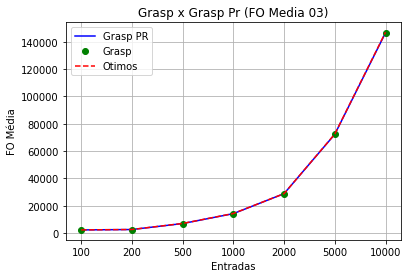

In [22]:
PlotMedia([df_grasp_pr, df_grasp, df_otimos], ['Grasp PR', 'Grasp', 'Otimos'])

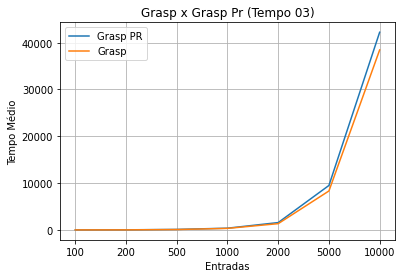

In [23]:
PlotTime([df_grasp_pr, df_grasp])